In [ ]:
import pandas as pd


df = pd.read_csv('/content/ds_job.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.shape

(3755, 11)

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
for i in df.columns:
  print(i, ':', df[i].dtype)

work_year : int64
experience_level : object
employment_type : object
job_title : object
salary : int64
salary_currency : object
salary_in_usd : int64
employee_residence : object
remote_ratio : int64
company_location : object
company_size : object


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
max = -99999999999999
min = 999999999999999
tot = 0
count = 0

for _, i in df.iterrows():
  if i['job_title'] == "Data Engineer":
    x = i['salary']
    tot += x
    count += 1
    if max < x: max = x
    if min > x: min = x

print("Maximum salary: ", max)
print("Minimum salary: ", min)
print("Average salary: ", tot/count)

Maximum salary:  4450000
Minimum salary:  12000
Average salary:  156574.96346153846


In [ ]:
import numpy as np

def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    outliers = [x for x in data if x < lower_limit or x > upper_limit]

    return outliers

outliers = find_outliers(df['salary'])

print(f"Outliers: {outliers}")
print(f"Number of outliers: {len(outliers)}")


Outliers: [342810, 1650000, 309400, 510000, 342300, 318300, 1700000, 309400, 1400000, 329500, 304000, 353200, 317070, 1500000, 376080, 1400000, 1500000, 340000, 310000, 1300000, 1000000, 310000, 300240, 300240, 370000, 323300, 310000, 800000, 375000, 1350000, 318300, 385000, 370000, 1050000, 314100, 350000, 310000, 5000000, 1060000, 1440000, 840000, 1250000, 310000, 4000000, 1440000, 1125000, 1100000, 4460000, 2500000, 310000, 2800000, 350000, 1250000, 310000, 6600000, 375000, 350000, 315000, 345600, 400000, 3000000, 1800000, 633000, 500000, 7500000, 450000, 900000, 4200000, 2400000, 1000000, 1000000, 6000000, 324000, 1400000, 2400000, 1400000, 405000, 380000, 8500000, 7000000, 3000000, 700000, 450000, 400000, 2250000, 11000000, 2200000, 2100000, 450000, 720000, 1600000, 4900000, 1250000, 1200000, 11000000, 4000000, 1799997, 3000000, 1672000, 420000, 30400000, 416000, 2500000, 4450000, 423000, 450000, 325000, 435000, 1335000, 1450000, 423000, 412000, 7000000]
Number of outliers: 113


[]

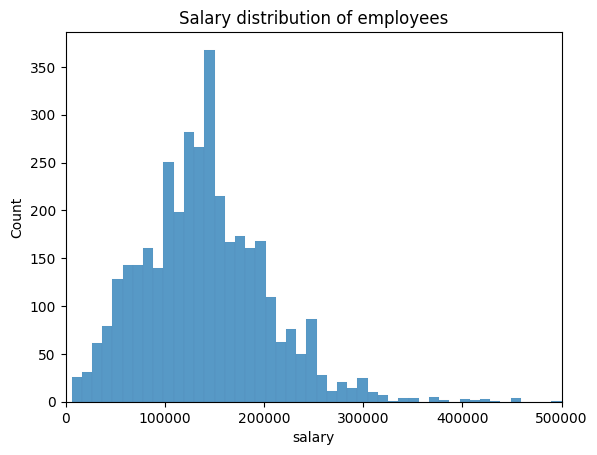

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['salary'])
plt.xlim(0, 500000)
plt.title("Salary distribution of employees")
plt.plot()

[]

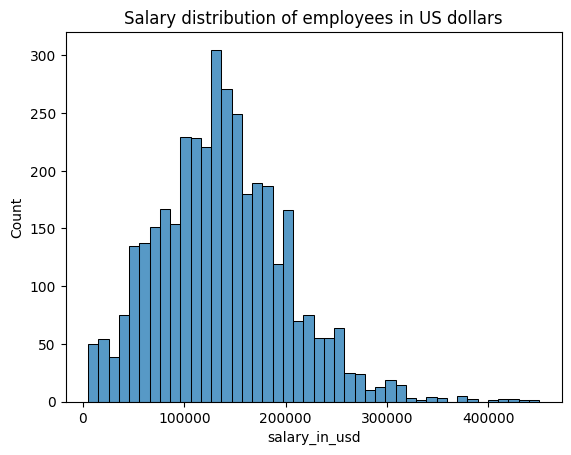

In [ ]:
sns.histplot(df['salary_in_usd'])
plt.title("Salary distribution of employees in US dollars")
plt.plot()

[]

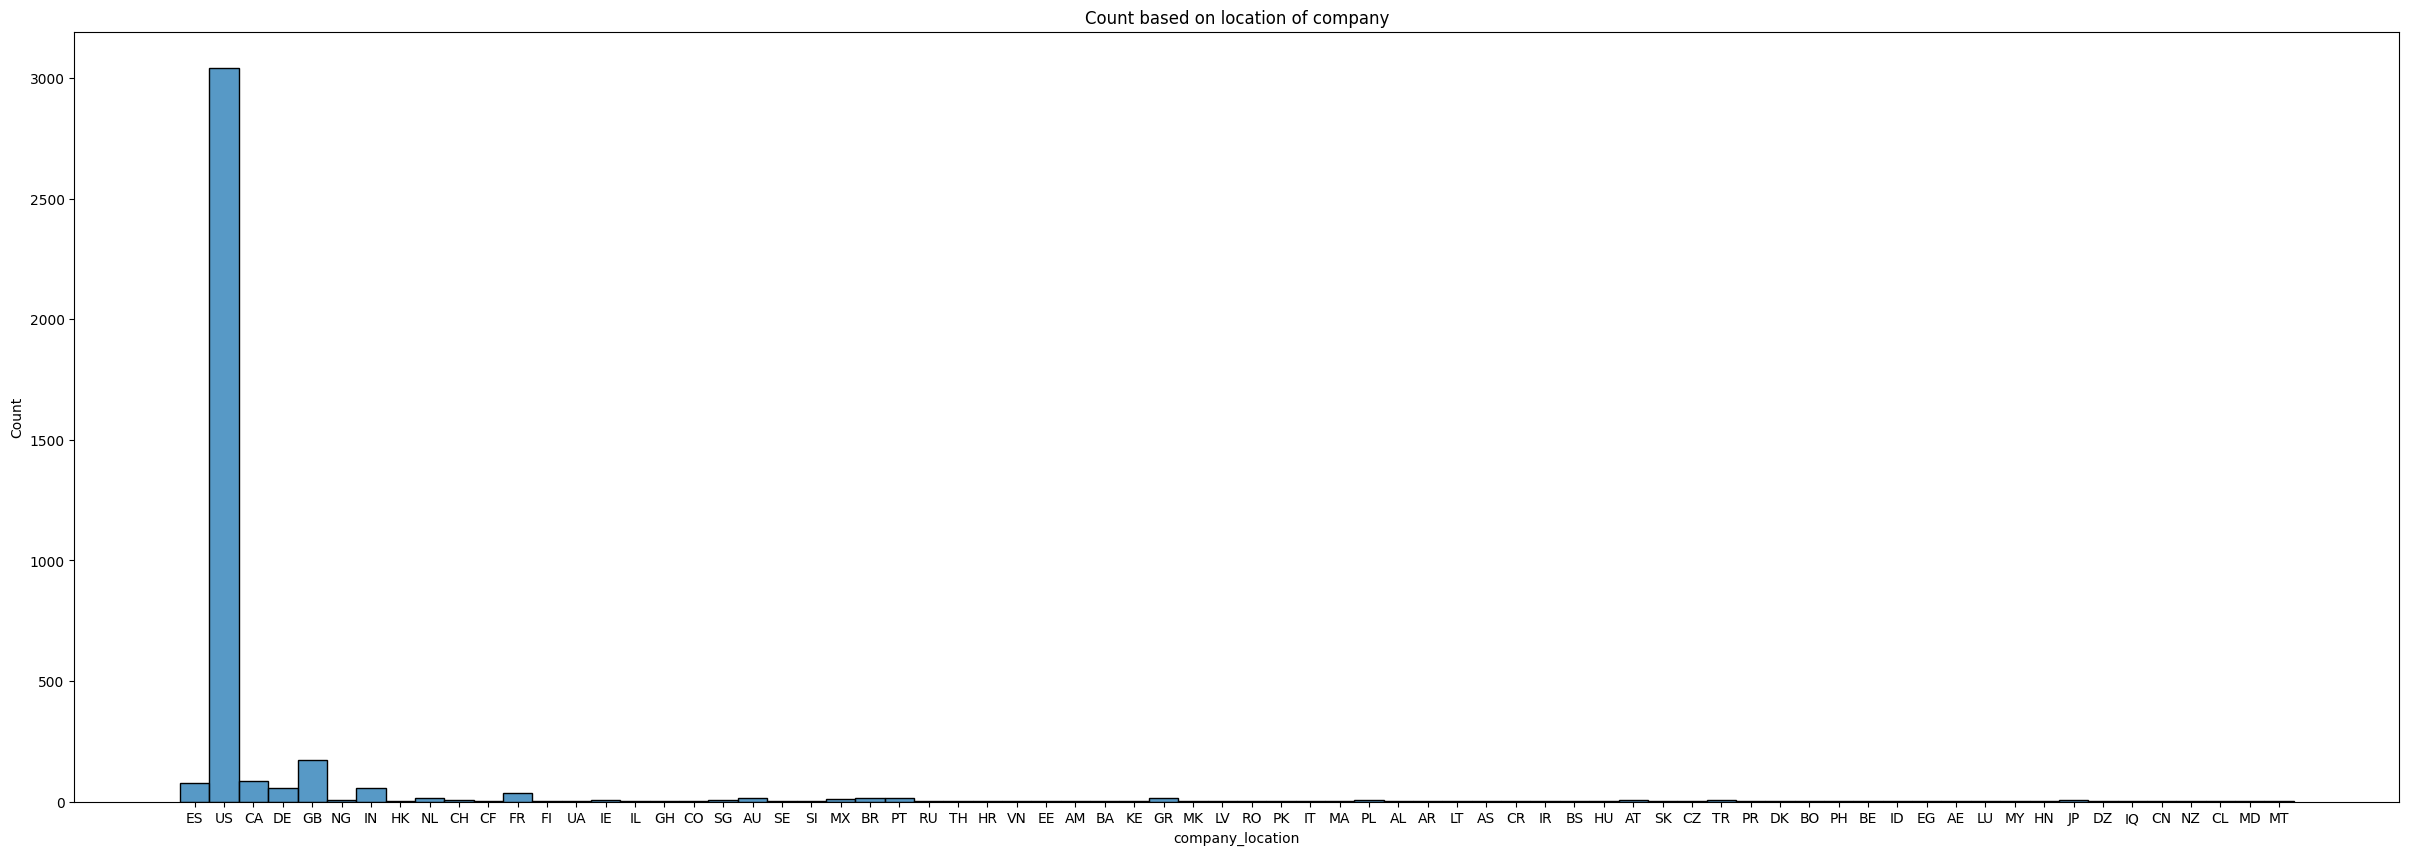

In [ ]:
plt.figure(figsize=(30, 10))
sns.histplot(df['company_location'])
plt.title("Count based on location of company")
plt.plot()

[]

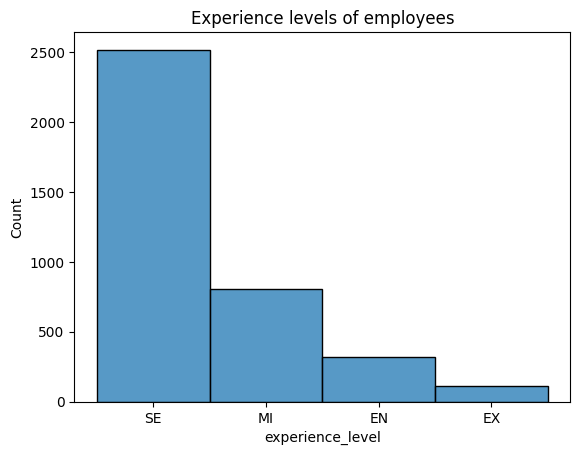

In [ ]:
sns.histplot(df['experience_level'])
plt.title("Experience levels of employees")
plt.plot()

In [ ]:
sorted_df = df.sort_values(by=['salary_in_usd'], ascending=False)
sorted_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L


<Axes: xlabel='job_title', ylabel='salary_in_usd'>

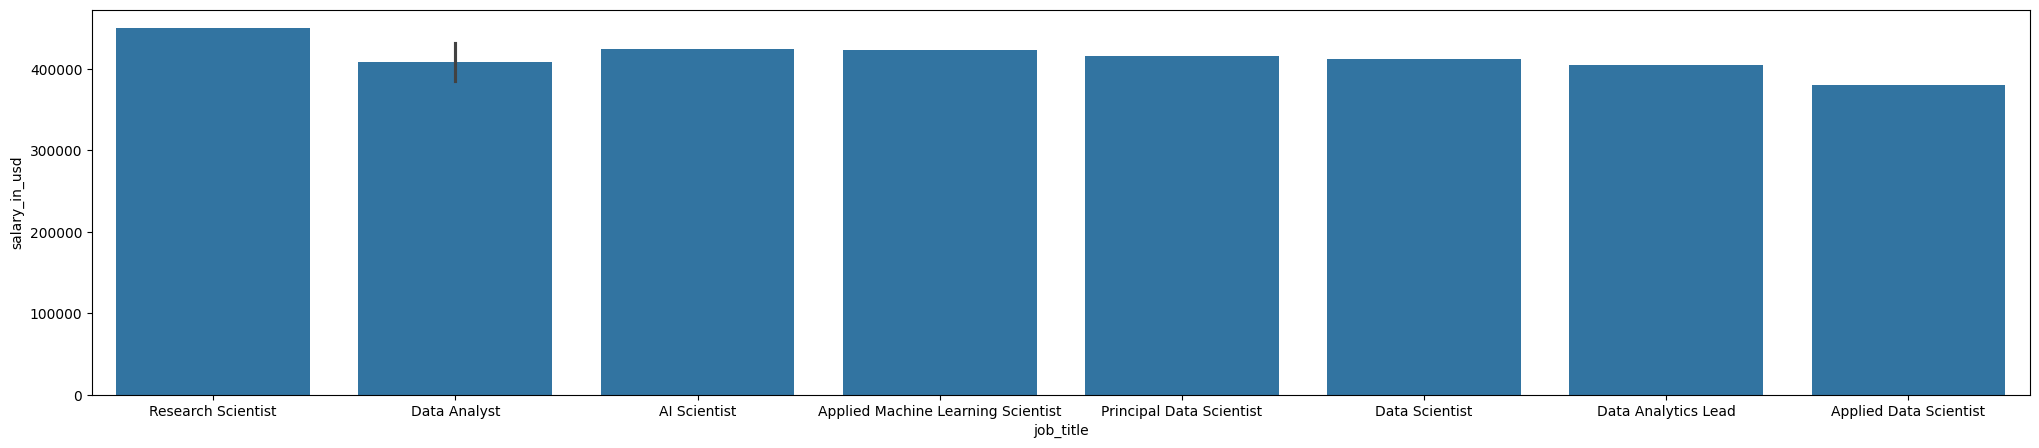

In [ ]:
sorted_df_top = sorted_df.iloc[:9, :]
plt.figure(figsize=(25, 5))
sns.barplot(y='salary_in_usd', x='job_title', data=sorted_df_top)

In [ ]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
mapping = {
    'SE': 'Expert',
    'MI': 'Intermediate',
    'EN': 'Entry',
    'EX': 'Executive'
}

df['experience_level'] = df['experience_level'].replace(mapping)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Expert,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Intermediate,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Intermediate,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Expert,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Expert,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Expert,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Intermediate,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


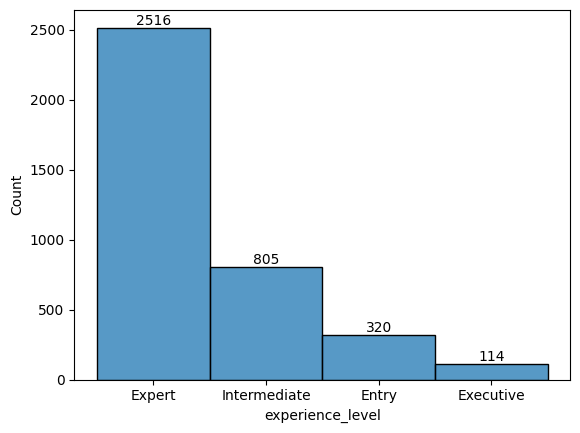

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.histplot(df['experience_level'], discrete=True, kde=False)

ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
jobs_2023 = df[df['work_year'] == 2023]
jobs_2023

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Expert,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Intermediate,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Intermediate,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Expert,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Expert,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1815,2023,Expert,FT,Machine Learning Engineer,134500,USD,134500,US,0,US,L
1817,2023,Intermediate,FT,Data Scientist,130000,USD,130000,US,0,US,M
1818,2023,Intermediate,FT,Data Scientist,90000,USD,90000,US,0,US,M
1819,2023,Entry,FT,Data Engineer,160000,USD,160000,US,0,US,M


In [ ]:
top_jobs = jobs_2023['job_title'].value_counts()
top_jobs = top_jobs.head(10)

In [ ]:
top_jobs

Data Engineer                499
Data Scientist               370
Data Analyst                 307
Machine Learning Engineer    158
Research Scientist            55
Data Architect                52
Analytics Engineer            46
Applied Scientist             40
Research Engineer             32
Data Manager                  22
Name: job_title, dtype: int64

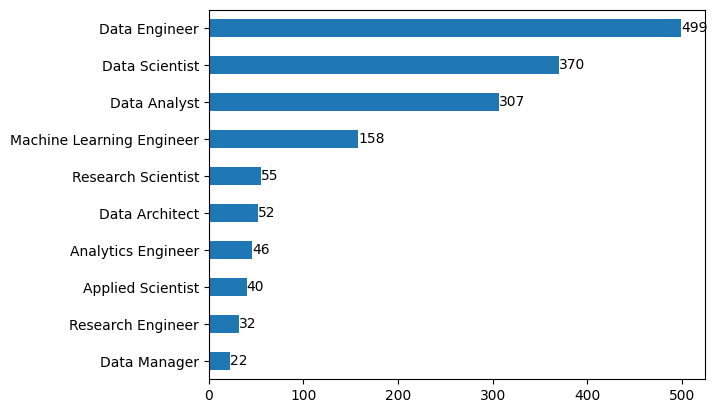

In [ ]:
fig, ax = plt.subplots()
top_jobs.plot(kind='barh')
ax.bar_label(ax.containers[0])
plt.gca().invert_yaxis()